<a href="https://colab.research.google.com/github/ilginkirez/ConflictVariantML/blob/main/Makine_%C3%96%C4%9Frenmesi_Tabanl%C4%B1_S%C4%B1n%C4%B1fland%C4%B1rma_ile_%C3%87eli%C5%9Fen_Genetik_Varyantlar%C4%B1n_%C3%87%C3%B6z%C3%BClmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Genetic Variant Classification Veri Kümesine Genel Bakış

Veri kümesi (https://www.kaggle.com/datasets/kevinarvai/clinvar-conflicting) hakkında aşağıdaki ayrıntıları kod üzerinde gösterdim ve bölümlere ayırdım:

• Kayıt Sayısı

• Özellik Sayısı

• Hedef Sınıfların Sayısı  

• Sınıf Başına Örnek Sayısı

• Eksik (NULL) Değer Sayısı
• Hangi özellikler sayısal değildir?

In [1]:
!pip uninstall -y patsy
!pip install patsy seaborn matplotlib statsmodels -q


Found existing installation: patsy 1.0.1
Uninstalling patsy-1.0.1:
  Successfully uninstalled patsy-1.0.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 5.1 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv("clinvar_conflicting.csv")



Saving clinvar_conflicting.csv to clinvar_conflicting (2).csv


/tmp/ipython-input-2784770210.py:6: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("clinvar_conflicting.csv")


## Kayıt Sayısı

In [3]:
record_count = df.shape[0]

print(f"Toplam Kayıt Sayısı: {record_count}")

Toplam Kayıt Sayısı: 65188


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

## Sınıf Başına Örnek Sayısı

In [5]:
categorical_columns = ['CHROM', 'REF', 'ALT', 'CLNDISDB', 'CLNDISDBINCL', 'CLNDN', 'CLNDNINCL', 'CLNHGVS',
'CLNSIGINCL', 'CLNVC', 'CLNVI', 'MC', 'Allele', 'Consequence', 'IMPACT', 'SYMBOL',
'Feature_type', 'Feature', 'BIOTYPE', 'EXON', 'INTRON', 'cDNA_position', 'CDS_position',
'Protein_position', 'Amino_acids', 'Codons', 'BAM_EDIT', 'SIFT', 'PolyPhen',
'MOTIF_NAME', 'HIGH_INF_POS'
]

for column in categorical_columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")


Column: CHROM
CHROM
2     8166
17    4918
11    4719
1     4454
5     3643
16    3586
19    3513
7     2867
9     2744
13    2515
12    2447
10    2341
6     2159
X     1926
8     1852
14    1755
3     1579
15    1557
4     1206
22    1043
3      950
18     785
21     724
20     682
2      479
17     476
19     398
16     341
12     303
14     219
15     168
13     131
11     127
21     119
18     111
22      92
20      77
MT      16
Name: count, dtype: int64


Column: REF
REF
C                                                                          21798
G                                                                          21361
A                                                                           9845
T                                                                           9421
CT                                                                           126
                                                                           ...  
CAGGTGG                         

## Özellik Sayısı

In [6]:
feature_count = df.shape[1]
print(f"Özellik Sayısı: {feature_count}")

column_names = df.columns.tolist()
print(f"Başlıklar: {column_names}")

Özellik Sayısı: 46
Başlıklar: ['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB', 'CLNDISDBINCL', 'CLNDN', 'CLNDNINCL', 'CLNHGVS', 'CLNSIGINCL', 'CLNVC', 'CLNVI', 'MC', 'ORIGIN', 'SSR', 'CLASS', 'Allele', 'Consequence', 'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 'EXON', 'INTRON', 'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids', 'Codons', 'DISTANCE', 'STRAND', 'BAM_EDIT', 'SIFT', 'PolyPhen', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 'MOTIF_SCORE_CHANGE', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'BLOSUM62']


In [7]:
print(df.columns)


Index(['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB',
       'CLNDISDBINCL', 'CLNDN', 'CLNDNINCL', 'CLNHGVS', 'CLNSIGINCL', 'CLNVC',
       'CLNVI', 'MC', 'ORIGIN', 'SSR', 'CLASS', 'Allele', 'Consequence',
       'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 'EXON',
       'INTRON', 'cDNA_position', 'CDS_position', 'Protein_position',
       'Amino_acids', 'Codons', 'DISTANCE', 'STRAND', 'BAM_EDIT', 'SIFT',
       'PolyPhen', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS',
       'MOTIF_SCORE_CHANGE', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'BLOSUM62'],
      dtype='object')


## Eksik (Null) Değer Sayısı


In [8]:
missing_values = df.isnull().sum()

print("Her Özellik İçin Eksik Değer Sayısı:")
print(missing_values)


Her Özellik İçin Eksik Değer Sayısı:
CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65021
CLNDN                     0
CLNDNINCL             65021
CLNHGVS                   0
CLNSIGINCL            65021
CLNVC                     0
CLNVI                 37529
MC                      846
ORIGIN                    0
SSR                   65058
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND     

In [9]:
import pandas as pd

missing_data = df.isnull().sum()
missing_data_percentage = (missing_data / len(df)) * 100

print("Eksik Veri Kontrolü:")
print(missing_data[missing_data > 0])

if missing_data_percentage.any():
    print("\nEksik veri tespit edildi. Oranlar:\n")
    print(missing_data_percentage[missing_data_percentage > 0])

    for column in missing_data[missing_data > 0].index:
        if df[column].dtype == 'object':
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            df[column] = df[column].fillna(df[column].median())

    print("\nEksik veriler başarıyla dolduruldu.")
else:
    print("\nEksik veri bulunamadı.")


Eksik Veri Kontrolü:
CLNDISDBINCL          65021
CLNDNINCL             65021
CLNSIGINCL            65021
CLNVI                 37529
MC                      846
SSR                   65058
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT              33219
SIFT                  40352
PolyPhen              40392
MOTIF_NAME            65186
MOTIF_POS             65186
HIGH_INF_POS          65186
MOTIF_SCORE_CHANGE    65186
LoFtool                4213
CADD_PHRED             1092
CADD_RAW               1092
BLOSUM62              39595
dtype: int64

Eksik veri tespit edildi. Oranlar:

CLNDISDBINCL          99.743818
CLNDNINCL             99.743818
CLNSIGINCL            99.

In [10]:
missing_values = df.isnull().sum()

print("Her Özellik İçin Eksik Değer Sayısı:")
print(missing_values)

Her Özellik İçin Eksik Değer Sayısı:
CHROM                 0
POS                   0
REF                   0
ALT                   0
AF_ESP                0
AF_EXAC               0
AF_TGP                0
CLNDISDB              0
CLNDISDBINCL          0
CLNDN                 0
CLNDNINCL             0
CLNHGVS               0
CLNSIGINCL            0
CLNVC                 0
CLNVI                 0
MC                    0
ORIGIN                0
SSR                   0
CLASS                 0
Allele                0
Consequence           0
IMPACT                0
SYMBOL                0
Feature_type          0
Feature               0
BIOTYPE               0
EXON                  0
INTRON                0
cDNA_position         0
CDS_position          0
Protein_position      0
Amino_acids           0
Codons                0
DISTANCE              0
STRAND                0
BAM_EDIT              0
SIFT                  0
PolyPhen              0
MOTIF_NAME            0
MOTIF_POS             0
HIG

## Sayısal Olmayan Değer Sayısı

In [11]:
import pandas as pd


non_numeric_columns = df.select_dtypes(exclude=['number']).columns

print("Sayısal Olmayan Sütunlar:")
print(non_numeric_columns)


Sayısal Olmayan Sütunlar:
Index(['CHROM', 'REF', 'ALT', 'CLNDISDB', 'CLNDISDBINCL', 'CLNDN', 'CLNDNINCL',
       'CLNHGVS', 'CLNSIGINCL', 'CLNVC', 'CLNVI', 'MC', 'Allele',
       'Consequence', 'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE',
       'EXON', 'INTRON', 'cDNA_position', 'CDS_position', 'Protein_position',
       'Amino_acids', 'Codons', 'BAM_EDIT', 'SIFT', 'PolyPhen', 'MOTIF_NAME',
       'HIGH_INF_POS'],
      dtype='object')


In [12]:
numeric_cols = df.select_dtypes(include=['number']).columns

print("Sayısal Olan Sütunlar:")
print(numeric_cols)



Sayısal Olan Sütunlar:
Index(['POS', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'ORIGIN', 'SSR', 'CLASS',
       'DISTANCE', 'STRAND', 'MOTIF_POS', 'MOTIF_SCORE_CHANGE', 'LoFtool',
       'CADD_PHRED', 'CADD_RAW', 'BLOSUM62'],
      dtype='object')


# Sayısal Özellik İstatistiği  




In [13]:
import pandas as pd

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

statistics = df[numerical_cols].agg(['min', 'max', 'mean']).transpose()

statistics.columns = ['Minimum Değer', 'Maksimum Değer', 'Ortalama Değer']

statistics


,Minimum Değer,Maksimum Değer,Ortalama Değer
POS,961.000000,2.476080e+08,7.757594e+07
AF_ESP,0.000000,4.990000e-01,1.451052e-02
AF_EXAC,0.000000,4.998900e-01,1.449218e-02
AF_TGP,0.000000,4.998000e-01,1.526350e-02
ORIGIN,0.000000,5.130000e+02,1.342486e+00
SSR,1.000000,1.600000e+01,1.002531e+00
CLASS,0.000000,1.000000e+00,2.521016e-01
DISTANCE,1.000000,4.759000e+03,4.695910e+02
STRAND,-1.000000,1.000000e+00,-6.872431e-03
MOTIF_POS,1.000000,1.000000e+00,1.000000e+00


# Kategorik Özellik Dağılımı


/tmp/ipython-input-878859447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")


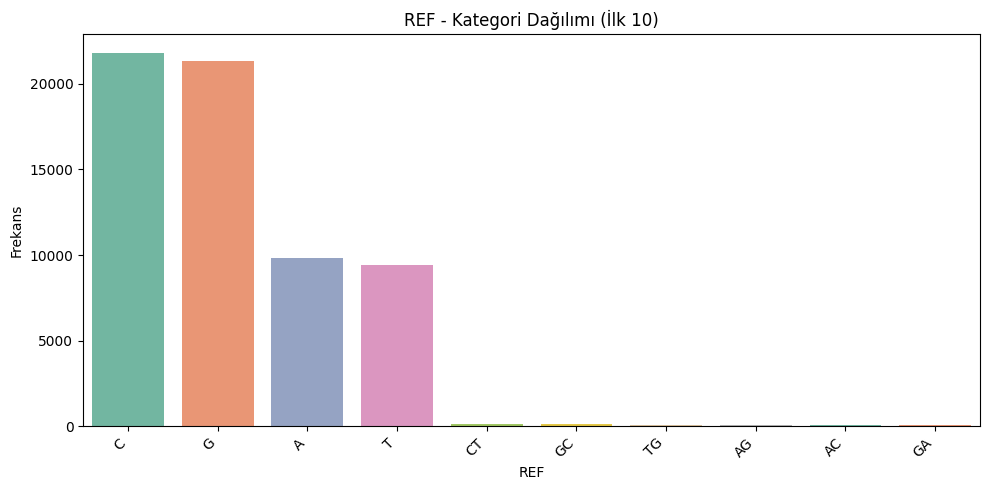

/tmp/ipython-input-878859447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")


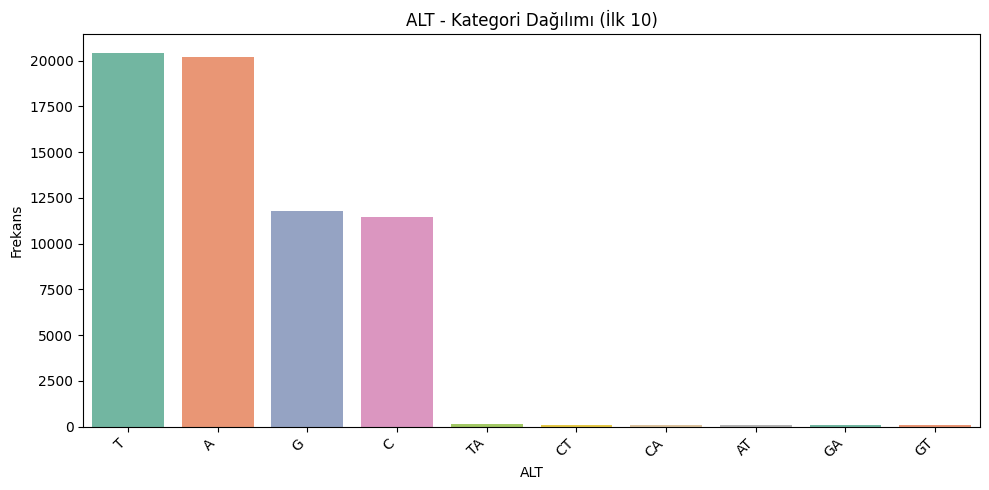

/tmp/ipython-input-878859447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")
/tmp/ipython-input-878859447.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


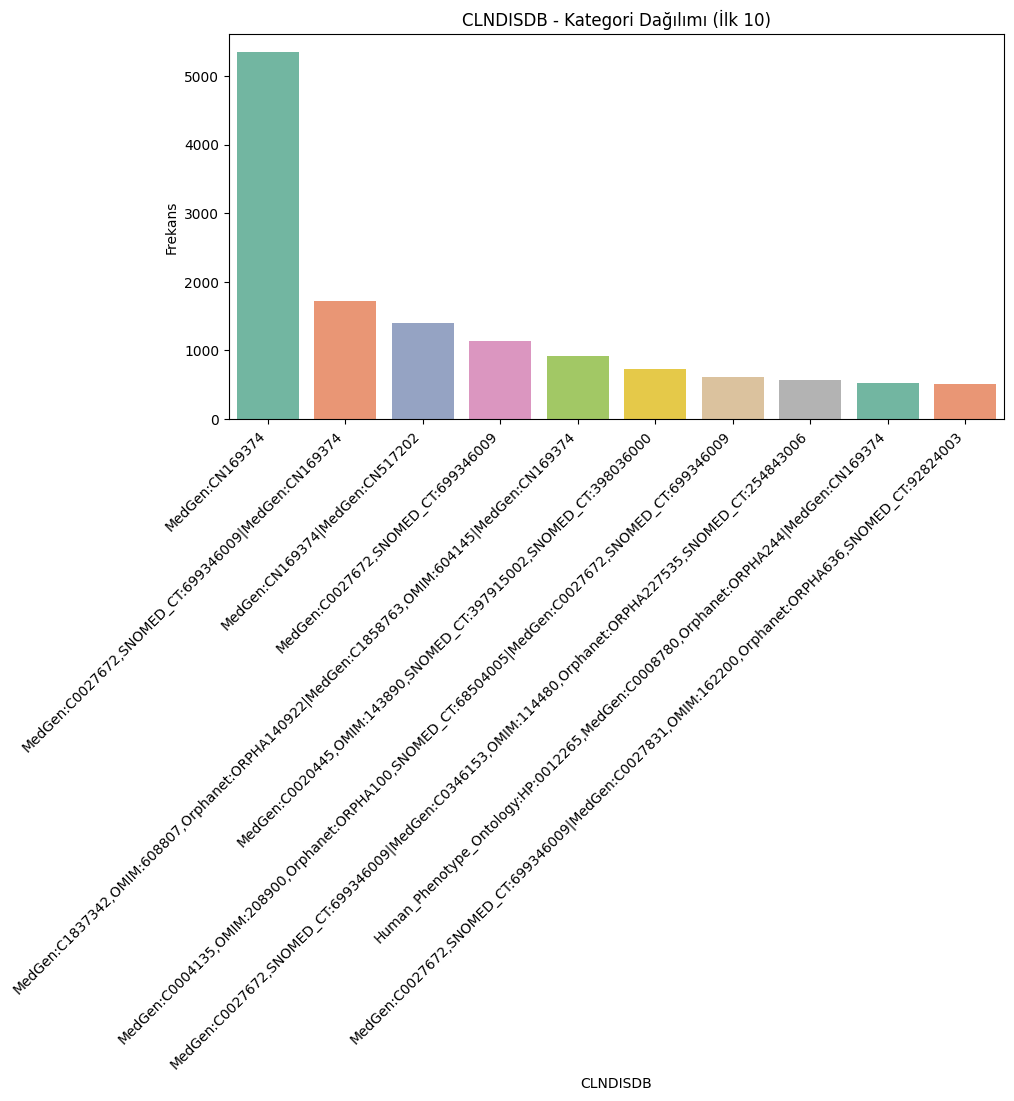

/tmp/ipython-input-878859447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")
/tmp/ipython-input-878859447.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


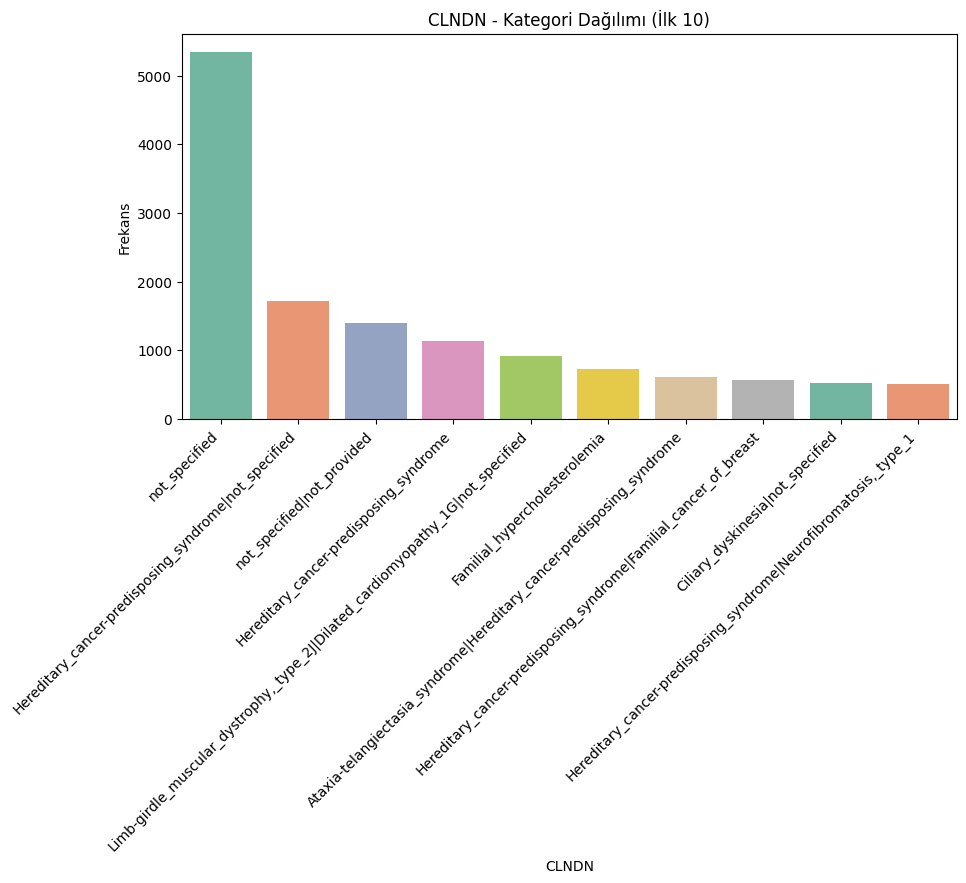

/tmp/ipython-input-878859447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")


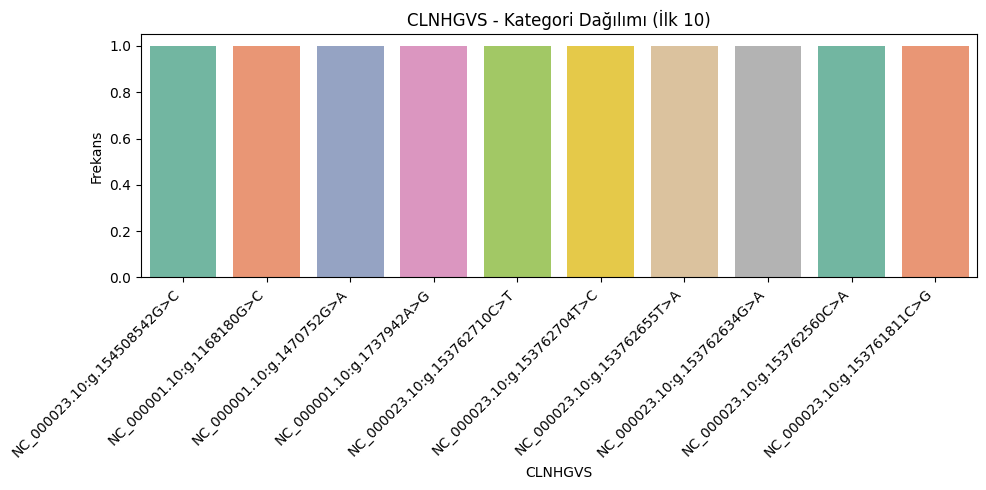

/tmp/ipython-input-878859447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")


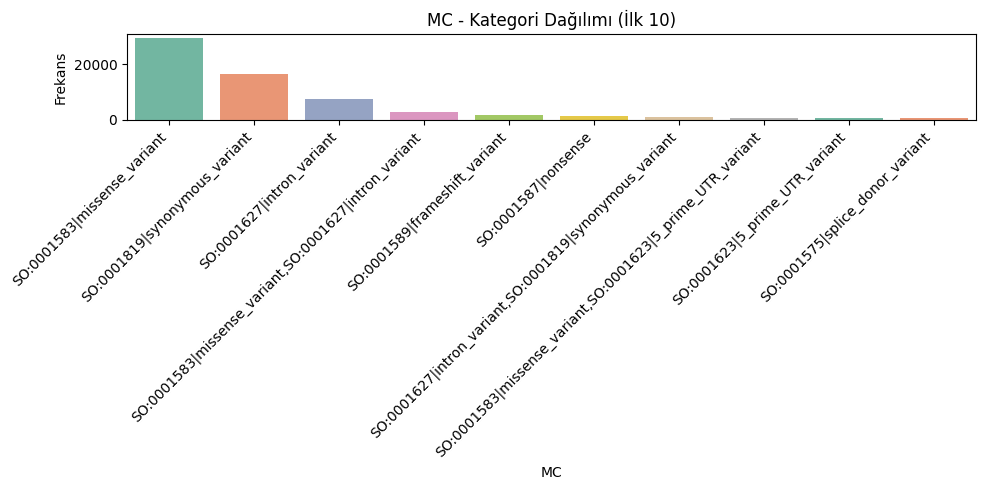

/tmp/ipython-input-878859447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")


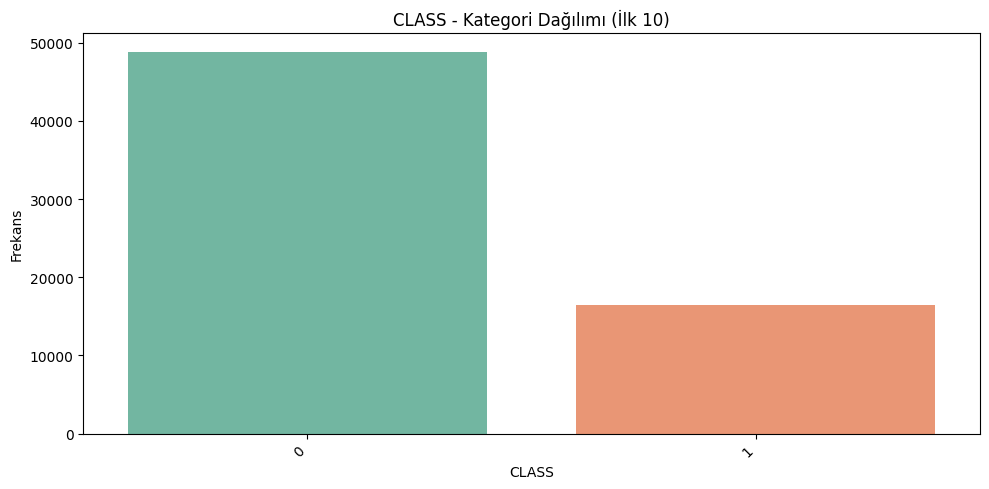

/tmp/ipython-input-878859447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")


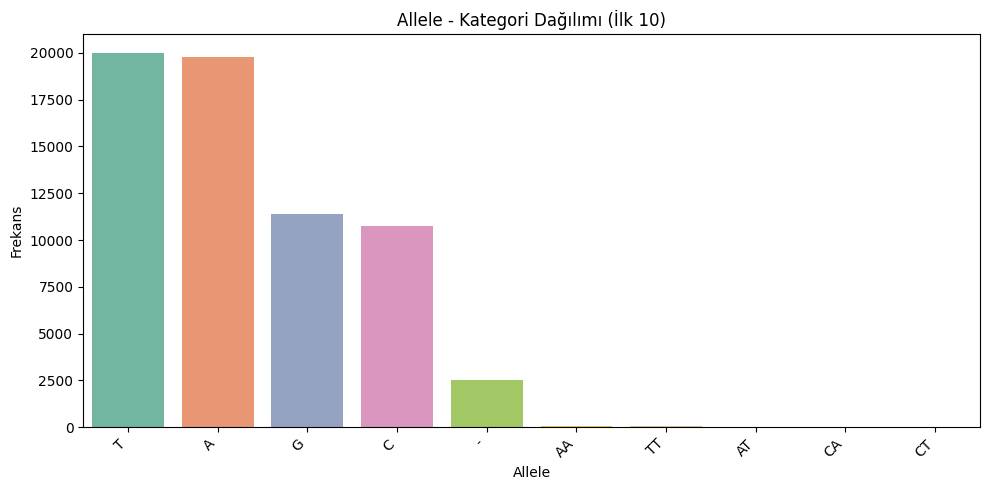

/tmp/ipython-input-878859447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")


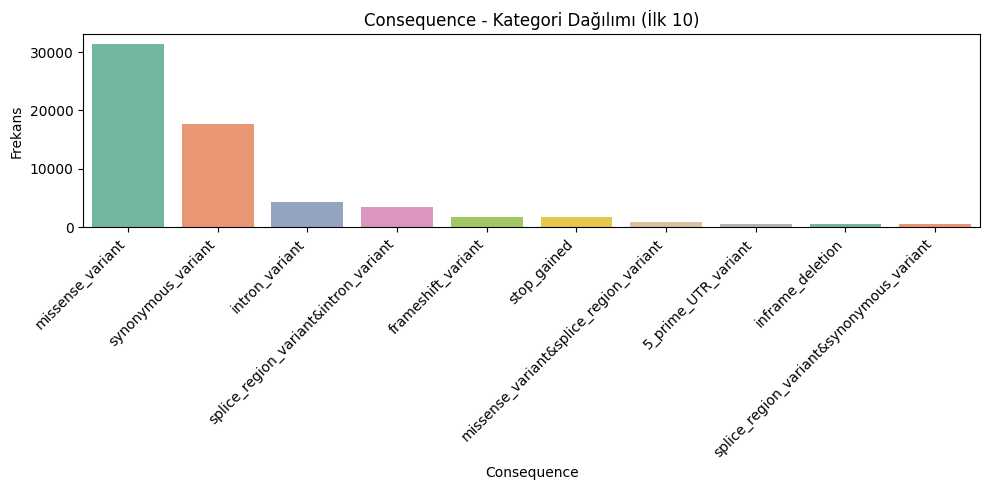

/tmp/ipython-input-878859447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")


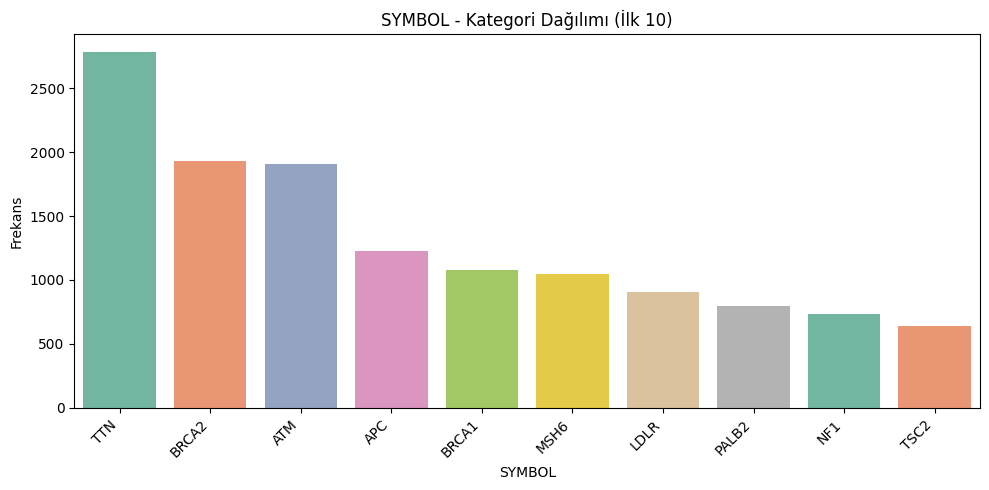

/tmp/ipython-input-878859447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")


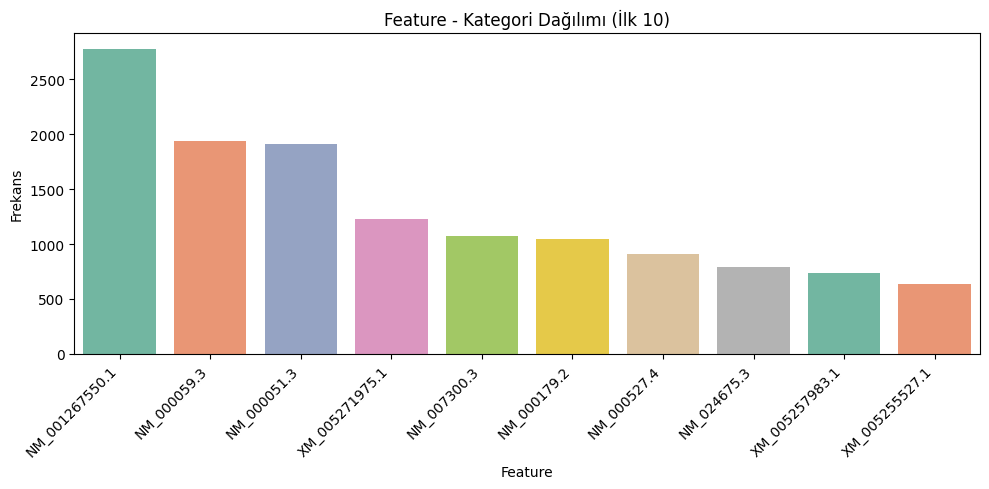

/tmp/ipython-input-878859447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")


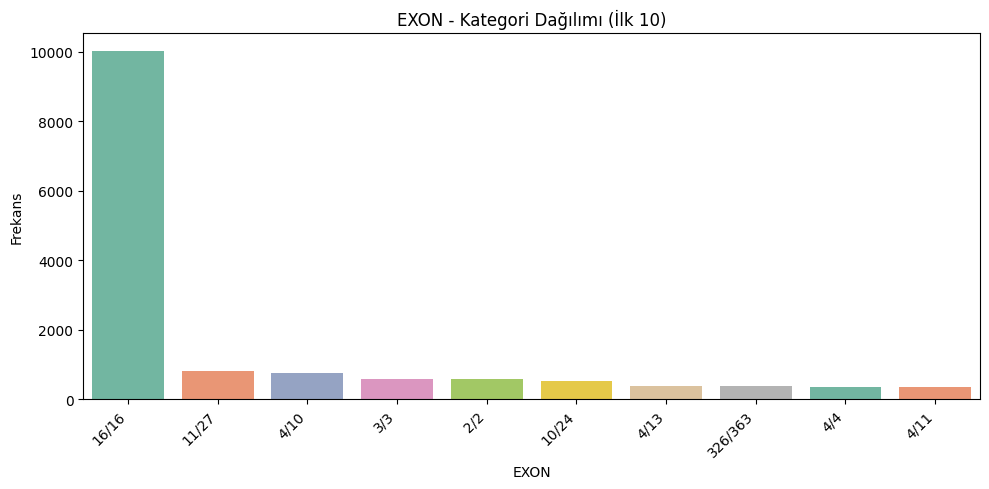

/tmp/ipython-input-878859447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")


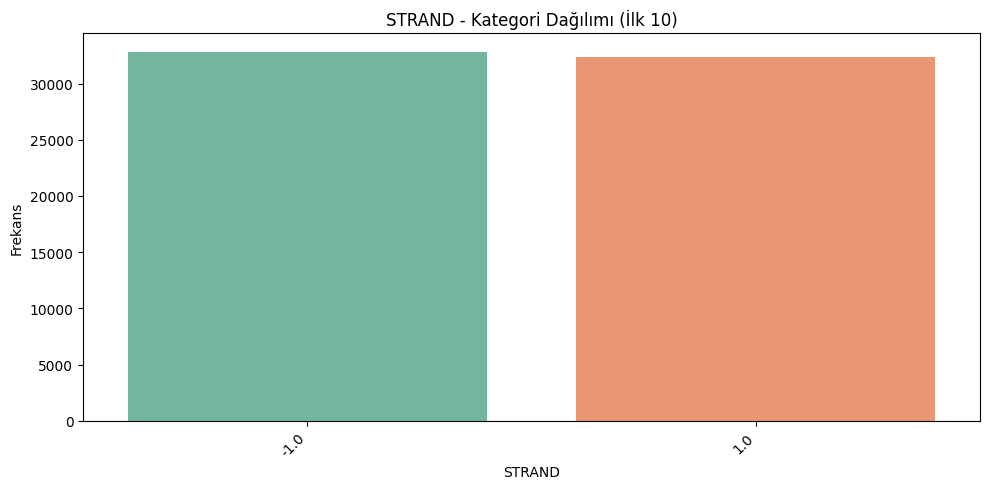

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = [
     'REF', 'ALT', 'CLNDISDB', 'CLNDN', 'CLNHGVS', 'MC',
    'CLASS', 'Allele', 'Consequence', 'SYMBOL', 'Feature',
    'EXON','STRAND',
    # These columns were likely created during one-hot encoding,
    # but they are not present in the original dataframe used for plotting.
    # Removing them from the list of columns to plot.
    # 'CLNVC_single_nucleotide_variant',
    # 'IMPACT_LOW', 'IMPACT_MODERATE', 'IMPACT_MODIFIER',
    # 'BAM_EDIT_OK', 'SIFT_deleterious_low_confidence',
    # 'SIFT_tolerated_low_confidence', 'PolyPhen_possibly_damaging',
    # 'PolyPhen_probably_damaging'
]

# Reinstalling seaborn and matplotlib to address potential dependency issues
!pip install --upgrade seaborn matplotlib -q

for col in categorical_cols:
    plt.figure(figsize=(10, 5))

    # Limit to top 10 categories for better visualization
    value_counts = df[col].value_counts().head(10)

    sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")

    plt.title(f"{col} - Kategori Dağılımı (İlk 10)")
    plt.ylabel("Frekans")
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')  # Kategori isimleri uzun olabilir, eğik yaz
    plt.tight_layout()
    plt.show()

# Korelasyon Matrisi


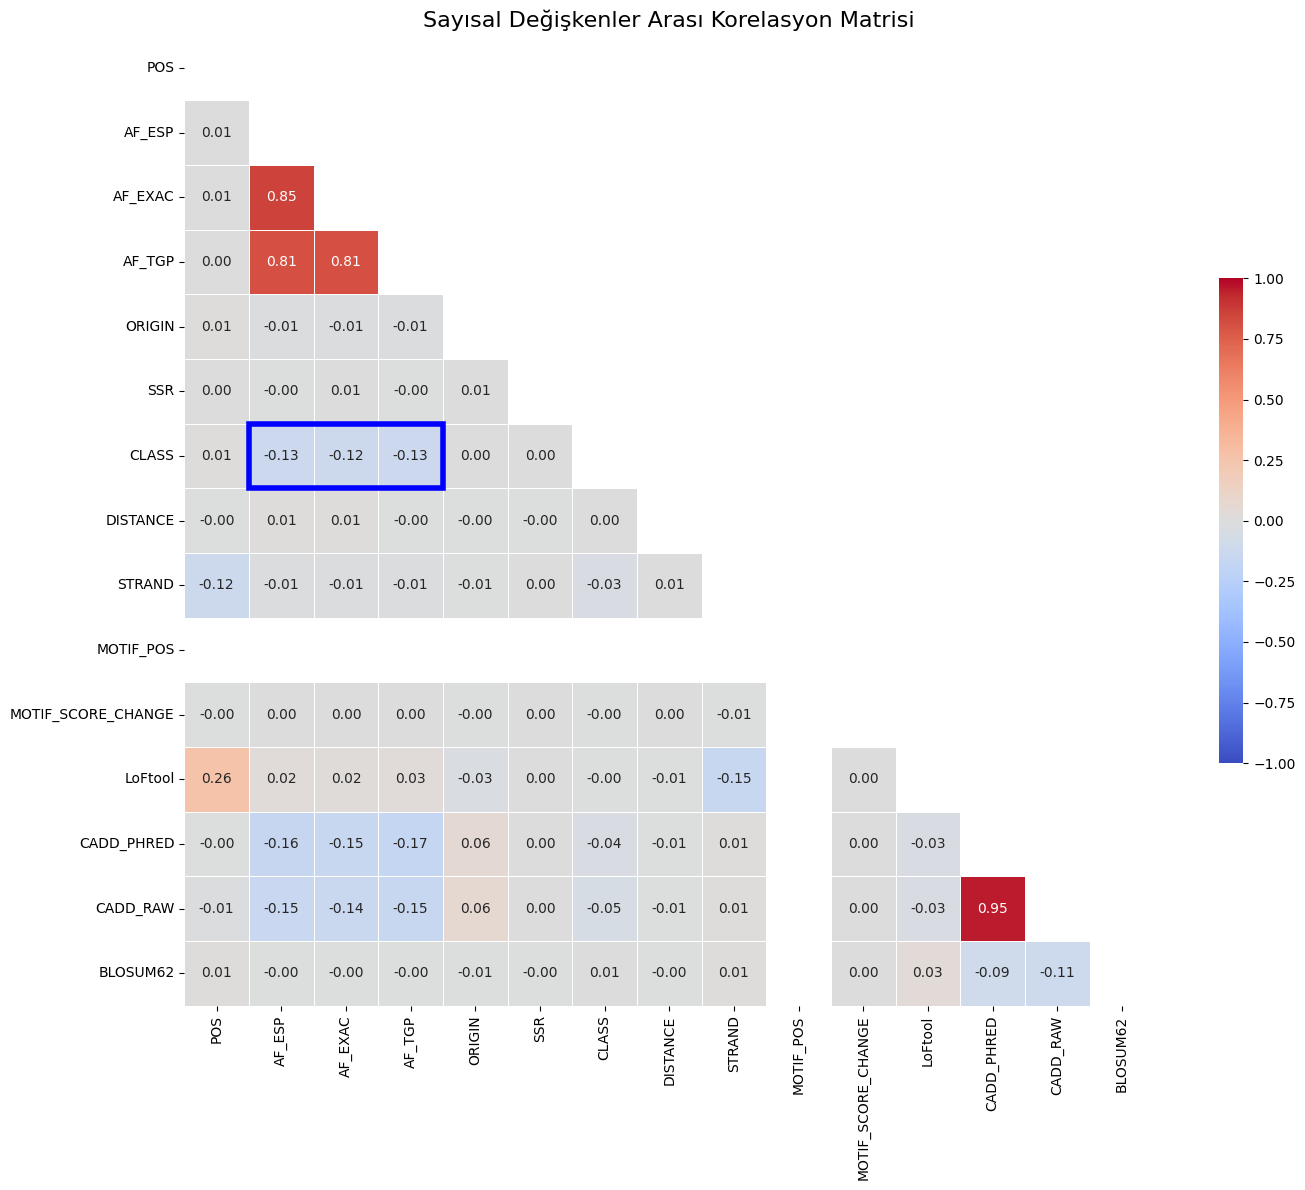

Güçlü Korelasyona Sahip Değişken Çiftleri (|corr| > 0.6):

CADD_RAW ↔ CADD_PHRED : korelasyon = 0.95
AF_EXAC ↔ AF_ESP : korelasyon = 0.85
AF_TGP ↔ AF_ESP : korelasyon = 0.81
AF_TGP ↔ AF_EXAC : korelasyon = 0.81


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

corr = df.select_dtypes(exclude='object').corr()
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.color_palette("coolwarm", as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
                square=True, linewidths=0.5, annot=True, fmt=".2f",
                cbar_kws={"shrink": .5})

g.add_patch(Rectangle((1, 6), 3, 1, fill=False, edgecolor='blue', lw=4))

plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi", fontsize=16)
plt.tight_layout()
plt.show()

print("Güçlü Korelasyona Sahip Değişken Çiftleri (|corr| > 0.6):\n")

high_corr_pairs = []

for i in range(len(corr.columns)):
    for j in range(i):
        corr_value = corr.iloc[i, j]
        if abs(corr_value) > 0.6:
            col1 = corr.columns[i]
            col2 = corr.columns[j]
            high_corr_pairs.append((col1, col2, corr_value))

high_corr_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)

for pair in high_corr_pairs:
    print(f"{pair[0]} ↔ {pair[1]} : korelasyon = {pair[2]:.2f}")

In [18]:
df = df.drop(columns=['CADD_RAW'])

print(df.head())


  CHROM      POS REF ALT  AF_ESP  AF_EXAC  AF_TGP  \
0     1  1168180   G   C  0.0771  0.10020  0.1066   
1     1  1470752   G   A  0.0000  0.00000  0.0000   
2     1  1737942   A   G  0.0000  0.00001  0.0000   
3     1  2160305   G   A  0.0000  0.00000  0.0000   
4     1  2160305   G   T  0.0000  0.00000  0.0000   

                                            CLNDISDB CLNDISDBINCL  \
0                                    MedGen:CN169374            .   
1  MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...            .   
2  Human_Phenotype_Ontology:HP:0000486,MedGen:C00...            .   
3  MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...            .   
4     MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002            .   

                                               CLNDN  ... BAM_EDIT  \
0                                      not_specified  ...       OK   
1             Spinocerebellar_ataxia_21|not_provided  ...       OK   
2  Strabismus|Nystagmus|Hypothyroidism|Intellectu...  ..

In [19]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,.,not_specified,...,OK,tolerated,benign,Egr1:MA0341.1,1.0,N,-0.08,0.157,1.053,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",.,Spinocerebellar_ataxia_21|not_provided,...,OK,deleterious_low_confidence,benign,Egr1:MA0341.1,1.0,N,-0.08,0.157,31.000,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",.,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,OK,deleterious,probably_damaging,Egr1:MA0341.1,1.0,N,-0.08,0.157,28.100,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",.,Shprintzen-Goldberg_syndrome|not_provided,...,OK,deleterious,benign,Egr1:MA0341.1,1.0,N,-0.08,0.157,22.500,-1.0
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",.,Shprintzen-Goldberg_syndrome,...,OK,deleterious,benign,Egr1:MA0341.1,1.0,N,-0.08,0.157,24.700,-3.0


# Veri Ölçeklendirme ve Encoding


In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

low_cardinality = [col for col in categorical_columns if df[col].nunique() <= 10]

df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

high_cardinality = [col for col in categorical_columns if col not in low_cardinality]

le = LabelEncoder()
for col in high_cardinality:
    try:
        df[col] = le.fit_transform(df[col])
    except:
        df[col] = 0

print("İşlenmiş veri boyutu:", df.shape)
print(df.head())


İşlenmiş veri boyutu: (65188, 55)
   CHROM       POS  REF  ALT    AF_ESP   AF_EXAC    AF_TGP  CLNDISDB  \
0      0  0.004714  437  106  0.154509  0.200444  0.213285      8866   
1      0  0.005936  437    0  0.000000  0.000000  0.000000      6615   
2      0  0.007015    0  213  0.000000  0.000020  0.000000       750   
3      0  0.008721  437    0  0.000000  0.000000  0.000000      5993   
4      0  0.008721  437  335  0.000000  0.000000  0.000000      5989   

   CLNDISDBINCL  CLNDN  ...  Feature_type_Transcript  BIOTYPE_protein_coding  \
0             0   8960  ...                     True                    True   
1             0   8388  ...                     True                    True   
2             0   8449  ...                     True                    True   
3             0   8156  ...                     True                    True   
4             0   8154  ...                     True                    True   

   BAM_EDIT_OK  SIFT_deleterious_low_confidence  SIF

In [21]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [22]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,Feature_type_Transcript,BIOTYPE_protein_coding,BAM_EDIT_OK,SIFT_deleterious_low_confidence,SIFT_tolerated,SIFT_tolerated_low_confidence,PolyPhen_possibly_damaging,PolyPhen_probably_damaging,PolyPhen_unknown,MOTIF_NAME_FOXA1:MA0546.1
0,0,0.004714,437,106,0.154509,0.200444,0.213285,8866,0,8960,...,1,1,1,0,1,0,0,0,0,0
1,0,0.005936,437,0,0.000000,0.000000,0.000000,6615,0,8388,...,1,1,1,1,0,0,0,0,0,0
2,0,0.007015,0,213,0.000000,0.000020,0.000000,750,0,8449,...,1,1,1,0,0,0,0,1,0,0
3,0,0.008721,437,0,0.000000,0.000000,0.000000,5993,0,8156,...,1,1,1,0,0,0,0,0,0,0
4,0,0.008721,437,335,0.000000,0.000000,0.000000,5989,0,8154,...,1,1,1,0,0,0,0,0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CHROM                            65188 non-null  int64  
 1   POS                              65188 non-null  float64
 2   REF                              65188 non-null  int64  
 3   ALT                              65188 non-null  int64  
 4   AF_ESP                           65188 non-null  float64
 5   AF_EXAC                          65188 non-null  float64
 6   AF_TGP                           65188 non-null  float64
 7   CLNDISDB                         65188 non-null  int64  
 8   CLNDISDBINCL                     65188 non-null  int64  
 9   CLNDN                            65188 non-null  int64  
 10  CLNDNINCL                        65188 non-null  int64  
 11  CLNHGVS                          65188 non-null  int64  
 12  CLNSIGINCL        

# Model Eğitim ve Test


## Makine Öğrenmesi Modelleri

In [24]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.1 MB/s eta 0:00:00


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical


X = df.drop(columns=['CLASS'])
y = df['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

if y.nunique() > 2:
    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)
    output_dim = y_train_cat.shape[1]
    loss_fn = 'categorical_crossentropy'
    final_activation = 'softmax'
else:
    y_train_cat = y_train
    y_test_cat = y_test
    output_dim = 1
    loss_fn = 'binary_crossentropy'
    final_activation = 'sigmoid'


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import compute_class_weight

X = df.drop(columns=['CLASS'])
y = df['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
scale_pos_weight = weights[0] / weights[1]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', scale_pos_weight=scale_pos_weight, random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42, auto_class_weights='Balanced'),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\n================== {name} ==================")

    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



================== Logistic Regression ==================
Accuracy : 0.5810
Precision: 0.7317
Recall   : 0.5810
F1 Score : 0.6074

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.53      0.65      9768
         1.0       0.35      0.75      0.47      3270

    accuracy                           0.58     13038
   macro avg       0.60      0.64      0.56     13038
weighted avg       0.73      0.58      0.61     13038


================== Random Forest ==================
Accuracy : 0.8010
Precision: 0.7876
Recall   : 0.8010
F1 Score : 0.7751

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88      9768
         1.0       0.71      0.35      0.47      3270

    accuracy                           0.80     13038
   macro avg       0.76      0.65      0.67     13038
weighted avg       0.79      0.80      0.78     13038


================== KNN ==================

## Derin Öğrenme Modelleri

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(output_dim, activation=final_activation)
])

dnn_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
dnn_model.fit(X_train_scaled, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

print("\n--- DNN Test Sonucu ---")
dnn_model.evaluate(X_test_scaled, y_test_cat)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7478 - loss: 0.5424 - val_accuracy: 0.7478 - val_loss: 0.5265
Epoch 2/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7553 - loss: 0.5096 - val_accuracy: 0.7459 - val_loss: 0.5227
Epoch 3/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7593 - loss: 0.4937 - val_accuracy: 0.7524 - val_loss: 0.5107
Epoch 4/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7609 - loss: 0.4871 - val_accuracy: 0.7506 - val_loss: 0.5047
Epoch 5/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7674 - loss: 0.4792 - val_accuracy: 0.7446 - val_loss: 0.5133
Epoch 6/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7694 - loss: 0.4759 - val_accuracy: 0.7527 - val_loss: 0.5029
Epoch 7/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7738 - loss: 0.4670 - val_accuracy: 0.7515 - val_loss: 0.5026
Epoch 8/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7732 - loss: 0.4614 - 

[0.4971349835395813, 0.7608528733253479]

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

X = df.drop(columns=['CLASS'])
y = df['CLASS']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(2),

    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc}')


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1630/1630 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.7462 - loss: 0.5433 - val_accuracy: 0.7460 - val_loss: 0.5163
Epoch 2/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7499 - loss: 0.5101 - val_accuracy: 0.7556 - val_loss: 0.5043
Epoch 3/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7570 - loss: 0.4995 - val_accuracy: 0.7606 - val_loss: 0.4960
Epoch 4/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7595 - loss: 0.4916 - val_accuracy: 0.7616 - val_loss: 0.4955
Epoch 5/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7637 - loss: 0.4839 - val_accuracy: 0.7655 - val_loss: 0.4873
Epoch 6/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7627 - loss: 0.4846 - val_accuracy: 0.7677 - val_loss: 0.4880
Epoch 7/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7611 - loss: 0.4851 - val_accuracy: 0.7653 - val_loss: 0.4864
Epoch 8/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7647 - loss: 0.47

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

X = df.drop(columns=['CLASS'])
y = df['CLASS']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = models.Sequential([
    layers.GRU(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc}')


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1630/1630 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7429 - loss: 0.5490 - val_accuracy: 0.7493 - val_loss: 0.5168
Epoch 2/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7503 - loss: 0.5159 - val_accuracy: 0.7546 - val_loss: 0.5068
Epoch 3/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7556 - loss: 0.5058 - val_accuracy: 0.7574 - val_loss: 0.5000
Epoch 4/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7558 - loss: 0.5002 - val_accuracy: 0.7585 - val_loss: 0.4925
Epoch 5/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7558 - loss: 0.4950 - val_accuracy: 0.7628 - val_loss: 0.4928
Epoch 6/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7554 - loss: 0.4940 - val_accuracy: 0.7602 - val_loss: 0.4928
Epoch 7/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7627 - loss: 0.4862 - val_accuracy: 0.7616 - val_loss: 0.4905
Epoch 8/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7633 - loss: 0.4830 - val_accura

# Makine Öğrenimi Modellerinin Karşılaştırılması


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = []

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_random_split = accuracy_score(y_test, y_pred)
    print(f"Accuracy with Random Split: {acc_random_split:.4f}")

    cv_results = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {cv_results.mean():.4f} ± {cv_results.std():.4f}")

    results.append({
        'Model': model_name,
        'Random Split Accuracy': acc_random_split,
        'CV Accuracy': cv_results.mean(),
        'CV Accuracy Std Dev': cv_results.std()
    })

results_df = pd.DataFrame(results)
print("\nModel Comparison Results:")




Training Random Forest...
Accuracy with Random Split: 0.8050
Cross-Validation Accuracy: 0.8006 ± 0.0030

Training Gradient Boosting...
Accuracy with Random Split: 0.7767
Cross-Validation Accuracy: 0.7758 ± 0.0028

Training K-Nearest Neighbors...
Accuracy with Random Split: 0.7200
Cross-Validation Accuracy: 0.7195 ± 0.0014

Model Comparison Results:


In [31]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, train_test_split

def create_dnn_model(input_dim):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

X_train_dnn, X_test_dnn, y_train_dnn, y_test_dnn = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

model = create_dnn_model(X_train_dnn.shape[1])
model.fit(X_train_dnn, y_train_dnn, epochs=5, batch_size=32, verbose=0)

y_pred_dnn = (model.predict(X_test_dnn) > 0.5).astype(int)

acc_dnn_split = accuracy_score(y_test_dnn, y_pred_dnn)
prec_dnn = precision_score(y_test_dnn, y_pred_dnn)
rec_dnn = recall_score(y_test_dnn, y_pred_dnn)
f1_dnn = f1_score(y_test_dnn, y_pred_dnn)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, f1s = [], []

for train_idx, test_idx in cv.split(X_scaled, y):
    X_tr, X_te = X_scaled[train_idx], X_scaled[test_idx]
    y_tr, y_te = y[train_idx], y[test_idx]

    model = create_dnn_model(X_tr.shape[1])
    model.fit(X_tr, y_tr, epochs=5, batch_size=32, verbose=0)

    y_pred_cv = (model.predict(X_te) > 0.5).astype(int)
    accs.append(accuracy_score(y_te, y_pred_cv))
    f1s.append(f1_score(y_te, y_pred_cv))

print("\n=============== DNN SONUÇLARI ===============")
print(">>> RASTGELE BÖLÜNME <<<")
print(f"Accuracy : {acc_dnn_split:.4f}")
print(f"Precision: {prec_dnn:.4f}")
print(f"Recall   : {rec_dnn:.4f}")
print(f"F1 Score : {f1_dnn:.4f}")

print("\n>>> 5 Katlı ÇAPRAZ DOĞRULAMA <<<")
print(f"CV Accuracy : {np.mean(accs):.4f} ± {np.std(accs):.4f}")
print(f"CV F1 Score : {np.mean(f1s):.4f} ± {np.std(f1s):.4f}")

results_df = pd.concat([results_df, pd.DataFrame([{
    'Model': 'DNN',
    'Random Split Accuracy': acc_dnn_split,
    'CV Accuracy Mean': np.mean(accs),
    'CV Accuracy Std': np.std(accs)
}])], ignore_index=True)


408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

=============== DNN SONUÇLARI ===============
>>> RASTGELE BÖLÜNME <<<
Accuracy : 0.7555
Precision: 0.5915
Recall   : 0.0974
F1 Score : 0.1672

>>> 5 Katlı ÇAPRAZ DOĞRULAMA <<<
CV Accuracy : 0.7568 ± 0.0010
CV F1 Score : 0.1564 ± 0.0210


In [32]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, train_test_split
import pandas as pd

def create_cnn_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  # shape: (örnek_sayısı, özellik_sayısı, 1)

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y, stratify=y, test_size=0.2, random_state=42)

cnn_model = create_cnn_model((X_train_cnn.shape[1], 1))
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=32, verbose=0)

y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype(int)
acc_cnn_split = accuracy_score(y_test_cnn, y_pred_cnn)
f1_cnn_split = f1_score(y_test_cnn, y_pred_cnn)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs_cnn, f1s_cnn = [], []

for train_idx, test_idx in cv.split(X_cnn, y):
    X_tr, X_te = X_cnn[train_idx], X_cnn[test_idx]
    y_tr, y_te = y[train_idx], y[test_idx]

    model = create_cnn_model((X_tr.shape[1], 1))
    model.fit(X_tr, y_tr, epochs=5, batch_size=32, verbose=0)

    y_pred = (model.predict(X_te) > 0.5).astype(int)
    accs_cnn.append(accuracy_score(y_te, y_pred))
    f1s_cnn.append(f1_score(y_te, y_pred))

print("\n=============== CNN SONUÇLARI ===============")
print(">>> RASTGELE BÖLÜNME <<<")
print(f"Accuracy : {acc_cnn_split:.4f}")
print(f"F1 Score : {f1_cnn_split:.4f}")

print("\n>>> 5 Katlı ÇAPRAZ DOĞRULAMA <<<")
print(f"CV Accuracy : {np.mean(accs_cnn):.4f} ± {np.std(accs_cnn):.4f}")
print(f"CV F1 Score : {np.mean(f1s_cnn):.4f} ± {np.std(f1s_cnn):.4f}")

results_df = pd.concat([results_df, pd.DataFrame([{
    'Model': 'CNN',
    'Random Split Accuracy': acc_cnn_split,
    'CV Accuracy Mean': np.mean(accs_cnn),
    'CV Accuracy Std': np.std(accs_cnn)
}])], ignore_index=True)


408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

=============== CNN SONUÇLARI ===============
>>> RASTGELE BÖLÜNME <<<
Accuracy : 0.7563
F1 Score : 0.1508

>>> 5 Katlı ÇAPRAZ DOĞRULAMA <<<
CV Accuracy : 0.7584 ± 0.0010
CV F1 Score : 0.2223 ± 0.0320


# Model Karşılaştırma Tablosu

In [33]:
results_df[['Model', 'Random Split Accuracy']]


,Model,Random Split Accuracy
0,Random Forest,0.804955
1,Gradient Boosting,0.776730
2,K-Nearest Neighbors,0.719972
3,DNN,0.755484
4,CNN,0.756328


# Karışıklık Matrisi


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models


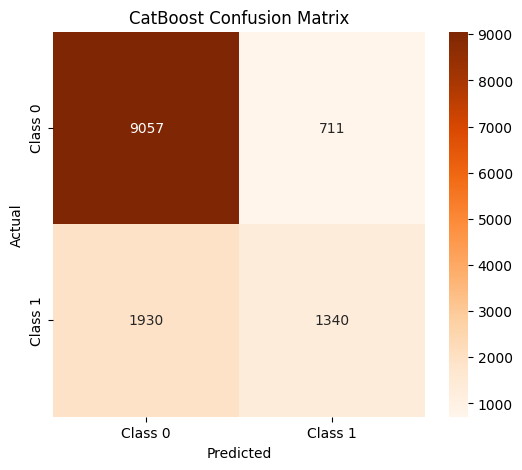

In [35]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(verbose=0, random_state=42)

catboost_model.fit(X_train, y_train)

y_pred_catboost = catboost_model.predict(X_test)

cm_catboost = confusion_matrix(y_test, y_pred_catboost)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Oranges', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('CatBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


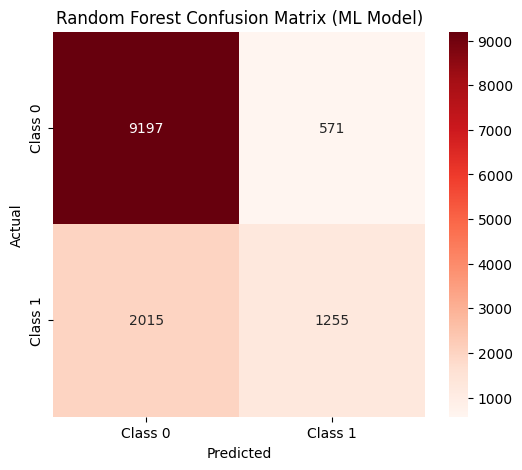

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['CLASS'])
y = df['CLASS']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Random Forest Confusion Matrix (ML Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1630/1630 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7434 - loss: 0.5487 - val_accuracy: 0.7517 - val_loss: 0.5105
Epoch 2/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7531 - loss: 0.5081 - val_accuracy: 0.7539 - val_loss: 0.5032
Epoch 3/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7563 - loss: 0.4999 - val_accuracy: 0.7568 - val_loss: 0.4982
Epoch 4/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7622 - loss: 0.4868 - val_accuracy: 0.7559 - val_loss: 0.4967
Epoch 5/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7623 - loss: 0.4834 - val_accuracy: 0.7609 - val_loss: 0.4903
Epoch 6/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7677 - loss: 0.4786 - val_accuracy: 0.7618 - val_loss: 0.4920
Epoch 7/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7705 - loss: 0.4669 - val_accuracy: 0.7576 - val_loss: 0.4909
Epoch 8/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7711 - loss: 0.4708 - val_accurac

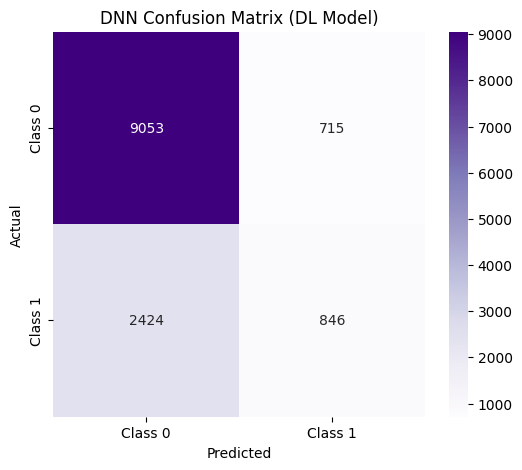

In [37]:
dl_model_dnn = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification için
])

dl_model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

dl_model_dnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred_dl_dnn = (dl_model_dnn.predict(X_test) > 0.5).astype('int32')

cm_dl_dnn = confusion_matrix(y_test, y_pred_dl_dnn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dl_dnn, annot=True, fmt='d', cmap='Purples', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('DNN Confusion Matrix (DL Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


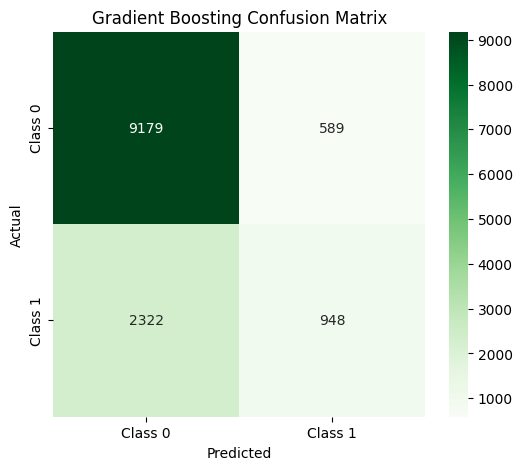

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1630/1630 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7454 - loss: 0.5421 - val_accuracy: 0.7497 - val_loss: 0.5124
Epoch 2/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7493 - loss: 0.5119 - val_accuracy: 0.7530 - val_loss: 0.5016
Epoch 3/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.7505 - loss: 0.5016 - val_accuracy: 0.7580 - val_loss: 0.4965
Epoch 4/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7601 - loss: 0.4908 - val_accuracy: 0.7568 - val_loss: 0.4914
Epoch 5/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7563 - loss: 0.4915 - val_accuracy: 0.7619 - val_loss: 0.4875
Epoch 6/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7582 - loss: 0.4852 - val_accuracy: 0.7625 - val_loss: 0.4878
Epoch 7/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7686 - loss: 0.4777 - val_accuracy: 0.7632 - val_loss: 0.4849
Epoch 8/10
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7646 - loss: 0.47

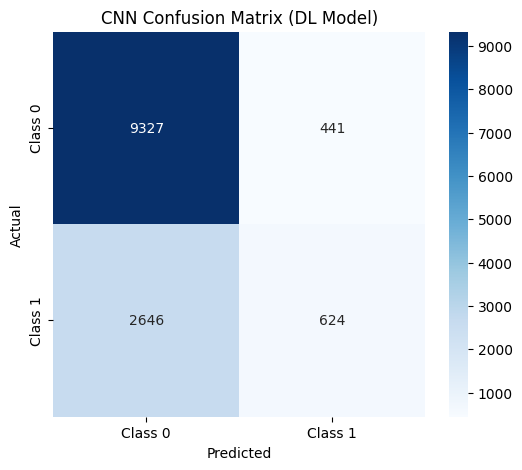

In [39]:
dl_model_cnn = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(2),

    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

dl_model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

dl_model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

y_pred_dl_cnn = (dl_model_cnn.predict(X_test_cnn) > 0.5).astype('int32')

cm_dl_cnn = confusion_matrix(y_test, y_pred_dl_cnn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dl_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('CNN Confusion Matrix (DL Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




# Eğitim Süresi Analizi ve Çalışma Zamanı Verimliliği  



In [40]:
import time
import numpy as np
import pandas as pd

results1_df = pd.DataFrame(columns=[
    'Model',
    'Random Split Accuracy',
    'Training Time (s)',
    'Avg Prediction Time per Sample (s)'
])


In [41]:
model = create_dnn_model(X_train.shape[1])

start_train = time.time()
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
end_train = time.time()
train_duration = end_train - start_train

sample = np.expand_dims(X_test[0], axis=0)
start_pred = time.time()
for _ in range(100):
    model.predict(sample)
end_pred = time.time()
avg_pred_time = (end_pred - start_pred) / 100

y_pred_dnn = (model.predict(X_test) > 0.5).astype(int)
acc_dnn = accuracy_score(y_test, y_pred_dnn)

results_df = pd.concat([results_df, pd.DataFrame([{
    'Model': 'DNN',
    'Random Split Accuracy': acc_dnn,
    'Training Time (s)': train_duration,
    'Avg Prediction Time per Sample (s)': avg_pred_time
}])], ignore_index=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import time

def create_cnn_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

cnn_model = create_cnn_model(input_shape=X_train_cnn.shape[1:])

start_train = time.time()
cnn_model.fit(X_train_cnn, y_train, epochs=5, batch_size=32, verbose=0)
end_train = time.time()
train_duration = end_train - start_train

sample = np.expand_dims(X_test_cnn[0], axis=0)
start_pred = time.time()
for _ in range(100):
    cnn_model.predict(sample)
end_pred = time.time()
avg_pred_time = (end_pred - start_pred) / 100

y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype(int)
acc_cnn = accuracy_score(y_test, y_pred_cnn)

results_df = pd.concat([results_df, pd.DataFrame([{
    'Model': 'CNN',
    'Random Split Accuracy': acc_cnn,
    'Training Time (s)': train_duration,
    'Avg Prediction Time per Sample (s)': avg_pred_time
}])], ignore_index=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import time

models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

for model_name, model in models.items():
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    train_duration = end_train - start_train

    sample = X_test[0].reshape(1, -1)
    start_pred = time.time()
    for _ in range(100):
        model.predict(sample)
    end_pred = time.time()
    avg_pred_time = (end_pred - start_pred) / 100

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results_df = pd.concat([results_df, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': acc,
        'Training Time (s)': train_duration,
        'Avg Prediction Time per Sample (s)': avg_pred_time
    }])], ignore_index=True)

print(results_df)


                 Model  Random Split Accuracy  CV Accuracy  \
0        Random Forest               0.804955     0.800608   
1    Gradient Boosting               0.776730     0.775818   
2  K-Nearest Neighbors               0.719972     0.719550   
3                  DNN               0.755484          NaN   
4                  CNN               0.756328          NaN   
5                  DNN               0.758245          NaN   
6                  CNN               0.759089          NaN   
7        Random Forest                    NaN          NaN   
8    Gradient Boosting                    NaN          NaN   
9             CatBoost                    NaN          NaN   

   CV Accuracy Std Dev  CV Accuracy Mean  CV Accuracy Std  Training Time (s)  \
0             0.002961               NaN              NaN                NaN   
1             0.002804               NaN              NaN                NaN   
2             0.001382               NaN              NaN                NaN 

#  Özellik Seçimi  

In [50]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd

mi_selector = SelectKBest(mutual_info_classif, k=3)

mi_selector.fit(X_train, y_train)

selected_feature_indices = mi_selector.get_support(indices=True)

selected_features_mi = X.columns[selected_feature_indices]

print("\n----- Mutual Information Seçilen Özellikler -----")
print(selected_features_mi)


----- Mutual Information Seçilen Özellikler -----
Index(['AF_EXAC', 'CLNDISDB', 'CLNDN'], dtype='object')


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr_model = LogisticRegression(max_iter=10000)
rfe_selector = RFE(estimator=lr_model, n_features_to_select=3)
X_rfe = rfe_selector.fit_transform(X_train, y_train)
selected_features_rfe = X.columns[rfe_selector.get_support()]

print("\n----- RFE Seçilen Özellikler -----")
print(selected_features_rfe)



----- RFE Seçilen Özellikler -----
Index(['AF_ESP', 'AF_TGP', 'IMPACT_LOW'], dtype='object')


In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[-3:]
selected_features_rf = X.columns[indices]

print("\n----- Random Forest Seçilen Özellikler -----")
print(selected_features_rf)



----- Random Forest Seçilen Özellikler -----
Index(['CADD_PHRED', 'CLNDISDB', 'AF_EXAC'], dtype='object')


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

X = df.drop('CLASS', axis=1)
y = df['CLASS']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

feature_importance = xgb_model.feature_importances_

indices = np.argsort(feature_importance)[-3:]

selected_features_xgb = X.columns[indices]
print("\n----- XGBoost ile Seçilen Özellikler -----")
print(selected_features_xgb)



----- XGBoost ile Seçilen Özellikler -----
Index(['IMPACT_LOW', 'AF_EXAC', 'AF_TGP'], dtype='object')


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

X = df.drop('CLASS', axis=1)
y = df['CLASS']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

lasso_coef = np.abs(lasso_model.coef_)

indices_lasso = np.argsort(lasso_coef)[-3:]
selected_features_lasso = X.columns[indices_lasso]
print("\n----- Lasso Seçilen Özellikler -----")
print(selected_features_lasso)



----- Lasso Seçilen Özellikler -----
Index(['PolyPhen_probably_damaging', 'PolyPhen_unknown',
       'MOTIF_NAME_FOXA1:MA0546.1'],
      dtype='object')


In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

X = df.drop('CLASS', axis=1)
y = df['CLASS']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X_scaled)

centroids = kmeans.cluster_centers_

feature_importance_clustering = np.abs(centroids[0] - centroids[1]) + np.abs(centroids[1] - centroids[2])

indices_clustering = np.argsort(feature_importance_clustering)[-3:]
selected_features_clustering = X.columns[indices_clustering]
print("\n----- Kümeleme Seçilen Özellikler -----")
print(selected_features_clustering)



----- Kümeleme Seçilen Özellikler -----
Index(['IMPACT_LOW', 'IMPACT_MODERATE', 'STRAND'], dtype='object')


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop('CLASS', axis=1)
y = df['CLASS']

corr_matrix = X.corr()

top_corr_features = corr_matrix.abs().unstack().sort_values(ascending=False)
top_corr_features = top_corr_features[top_corr_features < 1]  # Kendisiyle korelasyon dışı
top_corr_features = top_corr_features[:3]  # İlk 3 özelliği seçme

print("\n----- Korelasyon Matrisi ile Seçilen Özellikler -----")
print(top_corr_features)



----- Korelasyon Matrisi ile Seçilen Özellikler -----
Allele      ALT            0.944452
ALT         Allele         0.944452
IMPACT_LOW  Consequence    0.907669
dtype: float64


In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
from sklearn.metrics import accuracy_score

X = df.drop('CLASS', axis=1)
y = df['CLASS']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

lgb_importances = lgb_model.feature_importances_

indices_lgb = np.argsort(lgb_importances)[-3:]
selected_features_lgb = X.columns[indices_lgb]

print("\n----- LightGBM Seçilen Özellikler -----")
print(selected_features_lgb)

X_train_lgb = X_train[:, indices_lgb]
X_test_lgb = X_test[:, indices_lgb]

lgb_model.fit(X_train_lgb, y_train)
y_pred_lgb = lgb_model.predict(X_test_lgb)
print(f"\nLightGBM Model Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")


[LightGBM] [Info] Number of positive: 13147, number of negative: 39003
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5715
[LightGBM] [Info] Number of data points in the train set: 52150, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.252100 -> initscore=-1.087445
[LightGBM] [Info] Start training from score -1.087445

----- LightGBM Seçilen Özellikler -----
Index(['CLNVI', 'CLNDN', 'CLNDISDB'], dtype='object')
[LightGBM] [Info] Number of positive: 13147, number of negative: 39003
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 52150, number of used f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [66]:
print("\n----- 1.Lasso Seçilen Özellikler -----")
print(selected_features_lasso)

print("\n----- 2.Kümeleme Seçilen Özellikler -----")
print(selected_features_clustering)

print("\n----- 3.Korelasyon Matrisi Seçilen Özellikler -----")
print(top_corr_features)

print("\n----- 4.Mutual Information Seçilen Özellikler -----")
print(selected_features_mi)

print("\n----- 5.RFE Seçilen Özellikler -----")
print(selected_features_rfe)

print("\n----- 6.Random Forest Seçilen Özellikler -----")
print(selected_features_rf)

print("\n----- 7.XGBoost Seçilen Özellikler -----")
print(selected_features_xgb)

print("\n----- 8.Lightgbm Seçilen Özellikler -----")
print(selected_features_lgb)


----- 1.Lasso Seçilen Özellikler -----
Index(['PolyPhen_probably_damaging', 'PolyPhen_unknown',
       'MOTIF_NAME_FOXA1:MA0546.1'],
      dtype='object')

----- 2.Kümeleme Seçilen Özellikler -----
Index(['IMPACT_LOW', 'IMPACT_MODERATE', 'STRAND'], dtype='object')

----- 3.Korelasyon Matrisi Seçilen Özellikler -----
Allele      ALT            0.944452
ALT         Allele         0.944452
IMPACT_LOW  Consequence    0.907669
dtype: float64

----- 5.Mutual Information Seçilen Özellikler -----
Index(['AF_EXAC', 'CLNDISDB', 'CLNDN'], dtype='object')

----- 6.RFE Seçilen Özellikler -----
Index(['AF_ESP', 'AF_TGP', 'IMPACT_LOW'], dtype='object')

----- 7.Random Forest Seçilen Özellikler -----
Index(['CADD_PHRED', 'CLNDISDB', 'AF_EXAC'], dtype='object')

----- 9.XGBoost Seçilen Özellikler -----
Index(['IMPACT_LOW', 'AF_EXAC', 'AF_TGP'], dtype='object')

----- 10.Lightgbm Seçilen Özellikler -----
Index(['CLNVI', 'CLNDN', 'CLNDISDB'], dtype='object')


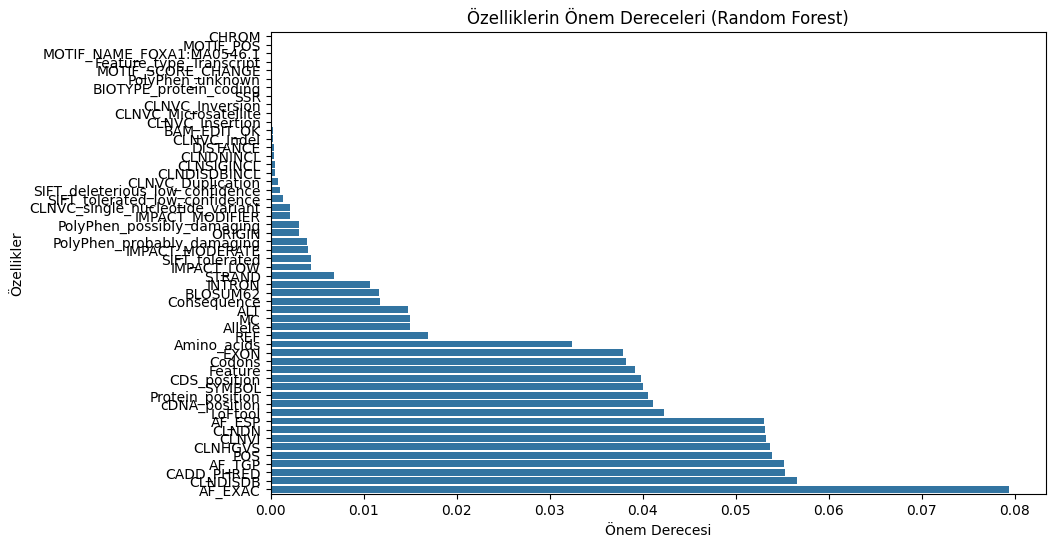

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf_model.feature_importances_
features = X.columns

indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=features[indices])
plt.title('Özelliklerin Önem Dereceleri (Random Forest)')
plt.xlabel('Önem Derecesi')
plt.ylabel('Özellikler')
plt.show()


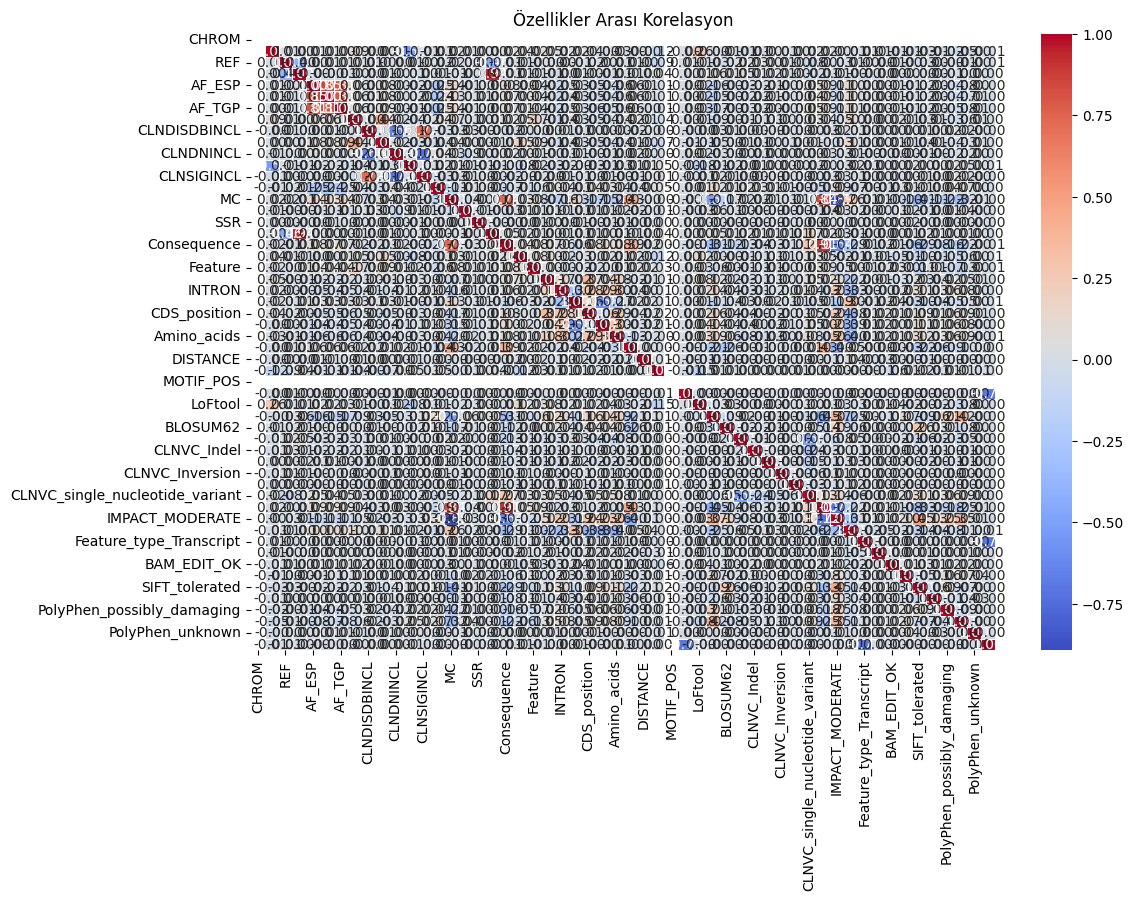

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Özellikler Arası Korelasyon')
plt.show()
